<a href="https://colab.research.google.com/github/slandai2/aiie2025-team1/blob/main/Chihuahuas-vs-muffins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing kagglehub
!pip install kagglehub

In [ ]:
import kagglehub
import shutil
import os

path = kagglehub.dataset_download("samuelcortinhas/muffin-vs-chihuahua-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/muffin-vs-chihuahua-image-classification


In [ ]:
# Define local save path
local_path = "./MuffinChihuahua_dataset/"

# Ensure the local directory exists
os.makedirs(local_path, exist_ok=True)
# Copy the dataset to the local directory
for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join(local_path, item)
    if os.path.isdir(s):
        shutil.copytree(s, d)
    else:
        shutil.copy2(s, d)

print(f"Dataset saved at: {local_path}")

print(f"Dataset saved at: {local_path}")

Dataset saved at: ./MuffinChihuahua_dataset/
Dataset saved at: ./MuffinChihuahua_dataset/


In [ ]:
import os
from PIL import Image

# Constants for image resizing
CROP_WIDTH = 256
CROP_HEIGHT = 256

def resize_images(input_folder, output_folder):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            try:
                with Image.open(input_path) as img:
                    img_resized = img.resize((CROP_WIDTH, CROP_HEIGHT))
                    img_resized.save(output_path)
                    print(f"Resized and saved: {output_path}")
            except Exception as e:
                print(f"Error processing {input_path}: {e}")

if __name__ == "__main__":
    input_folder = "/content/MuffinChihuahua_dataset/test/chihuahua"   # Change this to your dataset folder
    output_folder = "/content/MuffinChihuahua_Resized_Dataset/test/chihuahua" # Change this to where you want resized images
    resize_images(input_folder, output_folder)
    input_folder = "/content/MuffinChihuahua_dataset/test/muffin"
    output_folder = "/content/MuffinChihuahua_Resized_Dataset/test/muffin"
    resize_images(input_folder, output_folder)
    input_folder = "/content/MuffinChihuahua_dataset/train/chihuahua"
    output_folder = "/content/MuffinChihuahua_Resized_Dataset/train/chihuahua"
    resize_images(input_folder, output_folder)
    input_folder = "/content/MuffinChihuahua_dataset/train/muffin"
    output_folder = "/content/MuffinChihuahua_Resized_Dataset/train/muffin"
    resize_images(input_folder, output_folder)

Streaming output truncated to the last 5000 lines.
Resized and saved: /content/MuffinChihuahua_Resized_Dataset/test/muffin/img_3_449.jpg
Resized and saved: /content/MuffinChihuahua_Resized_Dataset/test/muffin/img_2_932.jpg
Resized and saved: /content/MuffinChihuahua_Resized_Dataset/test/muffin/img_0_757.jpg
Resized and saved: /content/MuffinChihuahua_Resized_Dataset/test/muffin/img_3_135.jpg
Resized and saved: /content/MuffinChihuahua_Resized_Dataset/test/muffin/img_1_1009.jpg
Resized and saved: /content/MuffinChihuahua_Resized_Dataset/test/muffin/img_4_606.jpg
Resized and saved: /content/MuffinChihuahua_Resized_Dataset/test/muffin/img_2_910.jpg
Resized and saved: /content/MuffinChihuahua_Resized_Dataset/test/muffin/img_3_749.jpg
Resized and saved: /content/MuffinChihuahua_Resized_Dataset/test/muffin/img_2_82.jpg
Resized and saved: /content/MuffinChihuahua_Resized_Dataset/test/muffin/img_3_91.jpg
Resized and saved: /content/MuffinChihuahua_Resized_Dataset/test/muffin/img_2_671.jpg
Resi

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os

In [ ]:
# Correcting paths
train_dir = "/content/MuffinChihuahua_Resized_Dataset/train"
test_dir = "/content/MuffinChihuahua_Resized_Dataset/test"

# Define ImageDataGenerator for augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load testing dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification (Muffin vs Chihuahua)
])

# Compile the model
learning_rate = 1.0
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    epochs=8,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.5079 - loss: 668258240.0000 - val_accuracy: 0.4595 - val_loss: 0.7017
Epoch 2/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.5160 - loss: 0.6985 - val_accuracy: 0.5405 - val_loss: 0.7236
Epoch 3/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.5045 - loss: 0.7082 - val_accuracy: 0.5405 - val_loss: 0.6990
Epoch 4/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.5281 - loss: 0.6950 - val_accuracy: 0.5405 - val_loss: 0.6900
Epoch 5/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.5170 - loss: 0.7049 - val_accuracy: 0.4595 - val_loss: 0.7066
Epoch 6/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.5132 - loss: 0.7017 - val_accuracy: 0.5405 - val_loss: 0.6908
Epoch 7/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.5336 - loss: 0.6948 - val_accuracy: 0.5405 - val_loss: 0.6931
Epoch 8/8
148/148 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.5096 - loss: 0.7079 - val_accu

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 654ms/step - accuracy: 0.5420 - loss: 0.6918
Test Accuracy: 0.54


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    prediction = model.predict(img_array)
    label = "Muffin" if prediction[0][0] > 0.5 else "Chihuahua"

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label}", fontsize=14, fontweight='bold')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


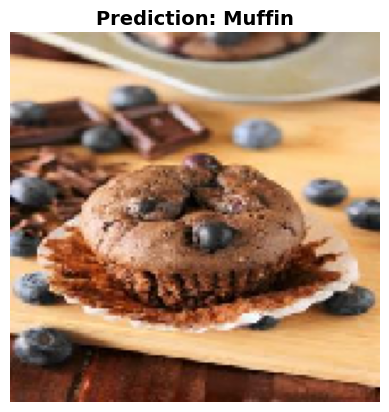

None


In [ ]:
# Example usage
img_path = "/content/MuffinChihuahua_Resized_Dataset/test/muffin/img_0_306.jpg"
print(predict_image(img_path))

Visualizing training results...


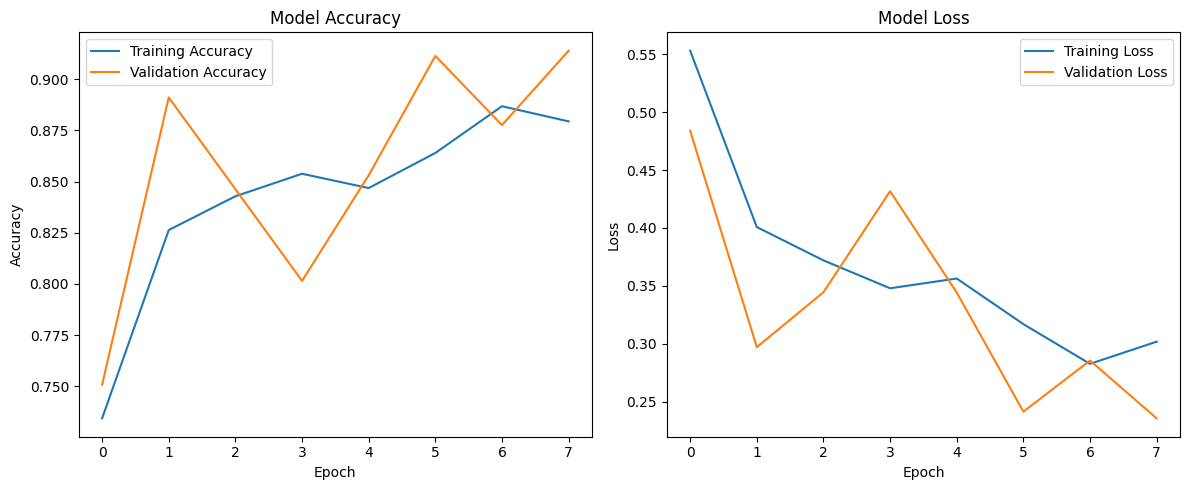

In [ ]:
#=== Visualization of training ===
print("Visualizing training results...")

#Plot accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 22.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


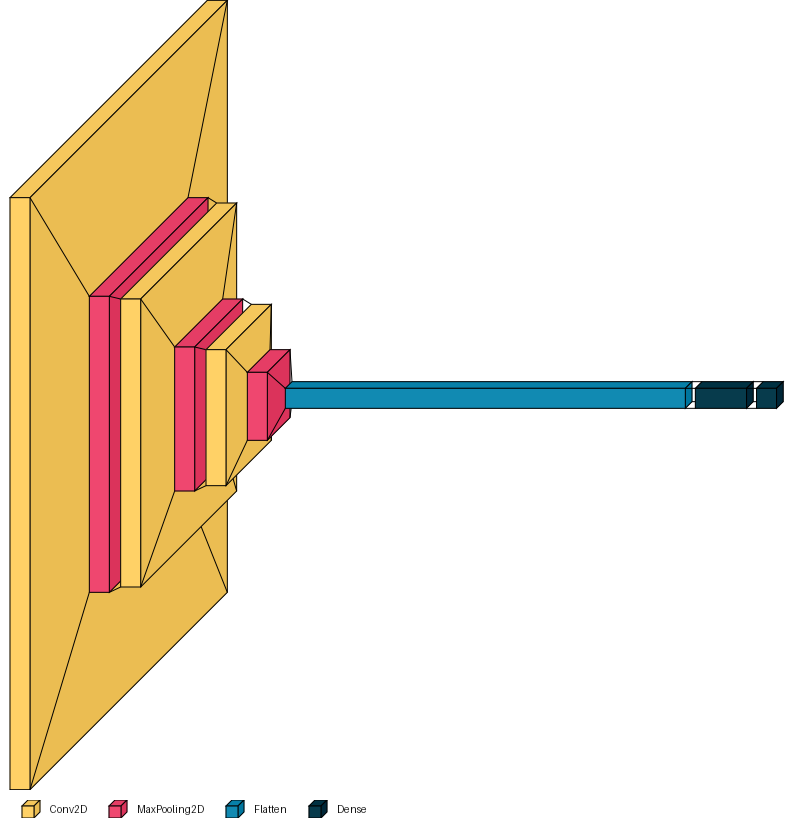

In [ ]:
!pip install visualkeras tensorflow

import visualkeras
from PIL import ImageFont

visualkeras.layered_view(model, legend=True, font=None)